#  Análisis de  tienda de Videojuegos ICE

***Descripción del proyecto***

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

*Descripción de datos*

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)


***Librerias necesarias***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import  stats as st


# 1. cargar archivo de datos y estudia la información general 

In [2]:
# cargar datos 

df= pd.read_csv('/datasets/games.csv', sep = ',')
df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Prepara los datos

In [3]:
df.columns = (df.columns.str.lower())
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


La columna 'year_of_release' se convertirá a un valor entero, ya que representa años y no debe contener valores decimales. Por otro lado, la columna 'user_score' se modificará al tipo float, dado que actualmente está almacenada como Object y debe manejarse como un número para facilitar su análisis. Antes de realizar este proceso se  analizaran los valores nulos den cada columna









In [5]:
null =  df.isna().sum()
print(null)
print()
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Número de filas duplicadas: 0


Dado que los valores nulos en 'year_of_release' representan solo aproximadamente 1.6% del total de datos, se ha decidido eliminarlos y proceder con la conversión de la columna a entero.

In [6]:
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
print(df[df['user_score'].isna()])

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

***Análisis de valores nulos de las variables score***

Debido a la gran cantidad de valores nulos presentes en las variables de score, es necesario realizar un análisis de estos datos con el fin de determinar la mejor acción a seguir para su tratamiento.

In [8]:
null_score = df[['critic_score','user_score']]

#user_score análisis

print('user_score análisis')
print()
tiene_coma = null_score['user_score'].astype(str).str.contains(',', na=False).any()
if tiene_coma:
    print("¡Hay números con comas!")
else:
    print("No hay comas en los números.")
    
print(null_score.value_counts('user_score'))

print()

#critic_score análisis
print('critic_score análisis')
print()
tiene_coma = null_score['critic_score'].astype(str).str.contains(',', na=False).any()
if tiene_coma:
    print("¡Hay números con comas!")
else:
    print("No hay comas en los números.")
print(null_score.value_counts('critic_score'))


user_score análisis

No hay comas en los números.
user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.9       2
0.2       2
9.7       1
0         1
Length: 96, dtype: int64

critic_score análisis

No hay comas en los números.
critic_score
70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
17.0      1
21.0      1
13.0      1
Length: 81, dtype: int64


In [9]:
print(null_score[null_score.isna()])

       critic_score user_score
0               NaN        NaN
1               NaN        NaN
2               NaN        NaN
3               NaN        NaN
4               NaN        NaN
...             ...        ...
16710           NaN        NaN
16711           NaN        NaN
16712           NaN        NaN
16713           NaN        NaN
16714           NaN        NaN

[16446 rows x 2 columns]


Tras observar los datos, se identifica que la columna 'user_score' contiene una gran cantidad de valores "tbd" (por determinar). Asimismo, se evidencia que las variables relacionadas con score presentan valores nulos, lo cual podría indicar que aún no se ha asignado una calificación, o que dicha información no estaba disponible al momento de la recolección de los datos.

Dado lo anterior, se procederá a convertir la columna 'user_score' al tipo de dato float. Para ello, y considerando que los valores "tbd" no representan datos numéricos válidos, se utilizará el argumento errors='coerce', lo cual permitirá transformar estos valores no convertibles en NaN sin afectar los demás datos relevantes, como las cifras de ventas.

Finalmente, al no encontrarse valores con separadores decimales incorrectos (como comas), se puede mantener el tipo de dato numérico sin necesidad de realizar transformaciones adicionales sobre dicha columna.

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float64')

Debido a la cantidad de datos, en este caso solo se modificará el tipo de dato a float64, lo que permitirá realizar sumas y promedios sin afectar las operaciones.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


***MANEJO DE DATOS NULOS***

In [12]:
print(null)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Se eliminarán los valores nulos de las columnas 'name' y 'genre'. La columna 'critic_score' se mantendrá sin cambios, ya que es de tipo float64 y los valores NaN no afectan las operaciones matemáticas. En cuanto a la columna 'rating', los valores nulos se reemplazarán por "Desconocido". Es posible que la información no estuviera disponible al momento de la recopilación.

In [13]:
df.dropna(subset=['name','genre'], inplace=True)
df['rating'].fillna('Unknow', inplace=True)
df.head(11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknow
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknow
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknow


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego

In [15]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknow,31.38


# 3. Analiza los datos

***LANZAMIENTOS POR AÑO***

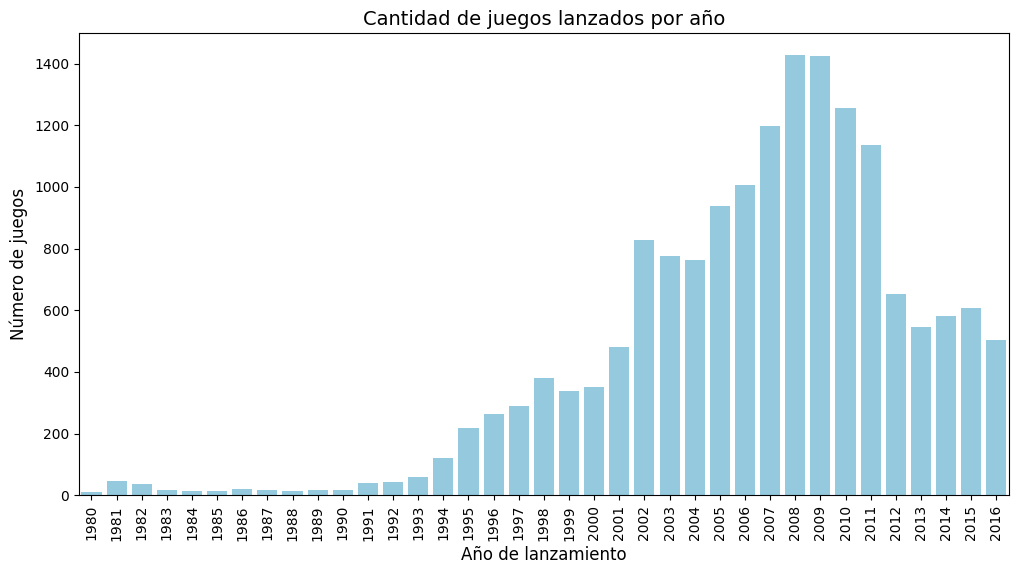

In [16]:
games_per_year = df['year_of_release'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')


plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Número de juegos', fontsize=12)
plt.title('Cantidad de juegos lanzados por año', fontsize=14)
plt.xticks(rotation=90) 

plt.show()


Entre 2008 y 2009 se registró el mayor número de lanzamientos de videojuegos, marcando el punto más alto en la industria en términos de cantidad de títulos publicados. Sin embargo, a partir de 2012, el número de lanzamientos disminuyo drásticamente. 

***VENTAS POR PLATAFORMA A LO LARGO DEL TIEMPO***

In [17]:
sales_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

top_platform = sales_platform.head(10)

print(top_platform)
print()
print(sales_platform)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Se realiza la grafica para ver el comportamiento de las  10 plataformas con mayor popularidad

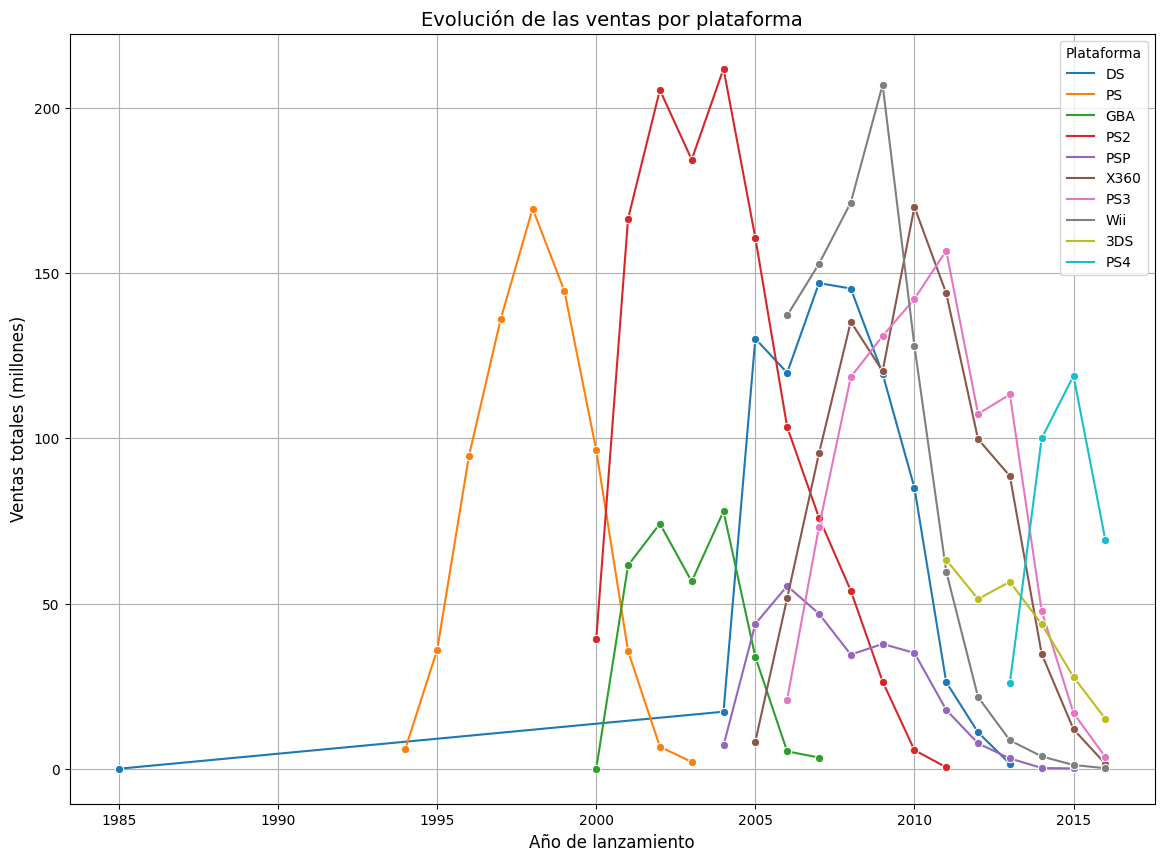

In [18]:
top_platforms_list = top_platform.index.tolist()
df_top = df[df['platform'].isin(top_platforms_list)]

sales_by_year_platform = df_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()


plt.figure(figsize=(14, 10))
sns.lineplot(data=sales_by_year_platform, x='year_of_release', y='total_sales', hue='platform', marker='o')


plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Ventas totales (millones)', fontsize=12)
plt.title('Evolución de las ventas por plataforma', fontsize=14)
plt.legend(title='Plataforma')
plt.grid(True)


plt.show()

***Plataformas que han dejado de vender***


In [19]:
last_year_sales = df.groupby('platform')['year_of_release'].max()
discontinued_platform = last_year_sales[last_year_sales<2014]

print(discontinued_platform)


platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: int64


***Vida util por plataforma***


In [20]:
platform_lifetime = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']

print(platform_lifetime.sort_values(by= 'lifetime', ascending= False))



           min   max  lifetime
platform                      
PC        1985  2016        31
DS        1985  2013        28
GB        1988  2001        13
X360      2005  2016        11
PSP       2004  2015        11
PS2       2000  2011        11
NES       1983  1994        11
DC        1998  2008        10
Wii       2006  2016        10
PS3       2006  2016        10
2600      1980  1989         9
SNES      1990  1999         9
PS        1994  2003         9
XB        2000  2008         8
GBA       2000  2007         7
GC        2001  2007         6
N64       1996  2002         6
3DS       2011  2016         5
PSV       2011  2016         5
SAT       1994  1999         5
WiiU      2012  2016         4
GEN       1990  1994         4
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
TG16      1995  1995         0
PCFX      1996  1996         0
GG      

Las plataformas exitosas suelen tener ciclos de vida de 6 a 10 años antes de ser reemplazadas por modelos nuevos. Mientras las plataformas que desaparecen (como Sega Saturn, Dreamcast) tuvieron ciclos más cortos posiblemente a su baja popularidad.

***Titutos y plataformas***

In [21]:
titles = df.groupby('name')['platform'].nunique()
multi_platform = titles[titles>1].index

df_multi= df[df['name'].isin(multi_platform)]

print(df_multi)

                                                   name platform  \
1                                     Super Mario Bros.      NES   
5                                                Tetris       GB   
16                                   Grand Theft Auto V      PS3   
17                        Grand Theft Auto: San Andreas      PS2   
18                                    Super Mario World     SNES   
...                                                 ...      ...   
16706                     Men in Black II: Alien Escape       GC   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16713                                  Spirits & Spells      GBA   
16714                               Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
1                 1985    Platform     29.08      3.58      6.81         0.77   
5                 198

<function matplotlib.pyplot.show(close=None, block=None)>

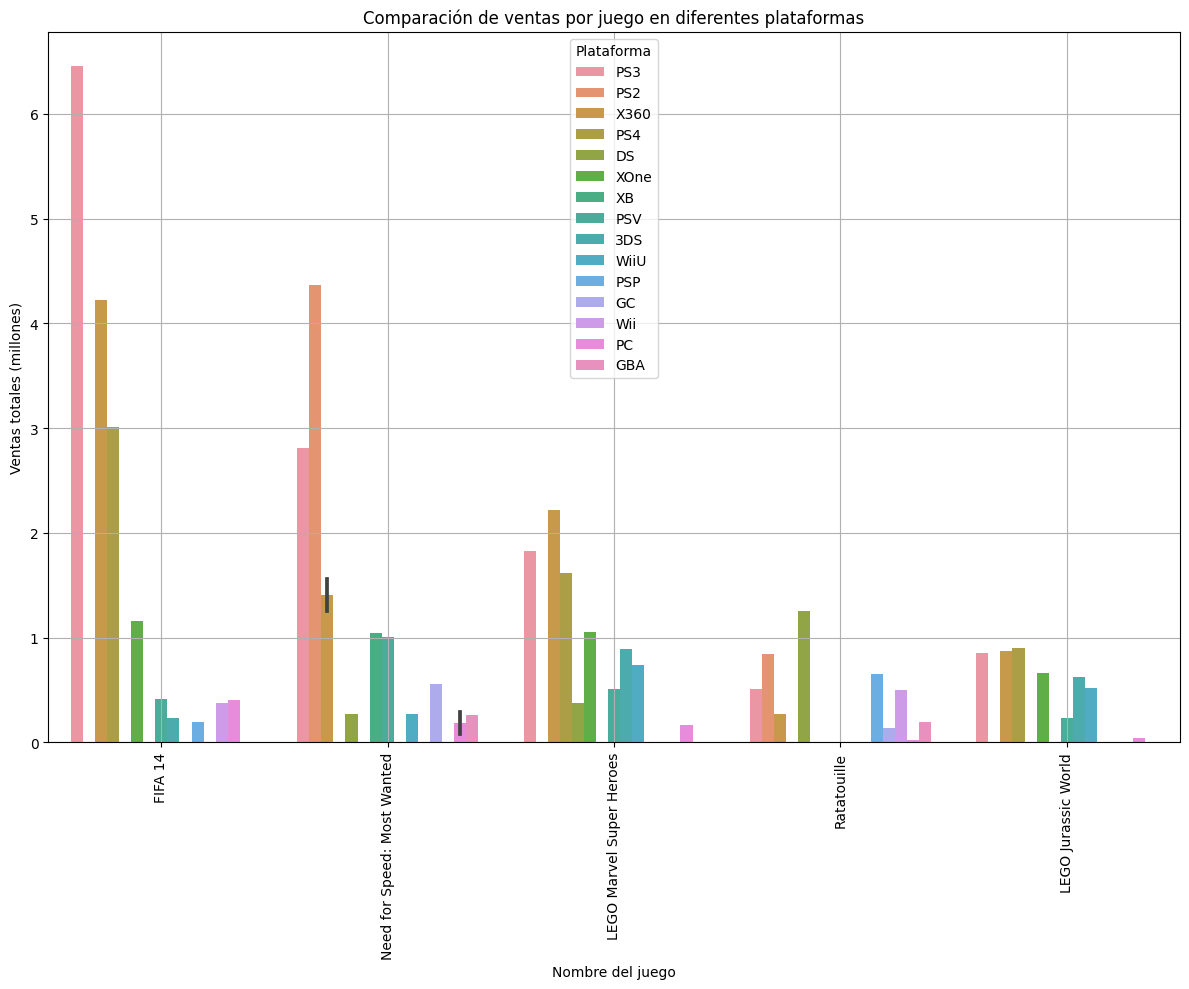

In [22]:
top_games = df_multi['name'].value_counts().index[:5]

filter_game = df_multi[df_multi['name'].isin(top_games)]

plt.figure(figsize=(12,10))
sns.barplot(data= filter_game, x= 'name', y='total_sales', hue= 'platform')

plt.title('Comparación de ventas por juego en diferentes plataformas')
plt.ylabel('Ventas totales (millones)')
plt.xlabel('Nombre del juego')
plt.xticks(rotation=90)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.grid(True)

plt.show

In [23]:
genre_df = df['genre'].value_counts()
print(genre_df)

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64


In [24]:
# Rentabilidad por genero
games_revenue = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(games_revenue)


genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


In [25]:
genre_by_platform= df.pivot_table(index='platform',
                                columns= 'genre',
                                values= 'total_sales',
                                aggfunc='sum',
                                fill_value =0
                                )
print(genre_by_platform)

genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
platform                                                                  
2600       26.31       0.40      0.77    3.57     13.26   13.67    2.32   
3DO         0.00       0.06      0.00    0.00      0.00    0.02    0.00   
3DS        57.84       4.83     10.56   10.99     32.53    5.57   14.87   
DC          1.26       2.50      1.83    0.00      2.53    0.00    2.65   
DS        111.31      45.83      7.08  135.56     75.80   82.09   37.96   
GB          7.93      17.15      0.00   13.35     53.88   47.47    4.55   
GBA        54.13      12.23      4.16   36.09     77.99   11.99   18.81   
GC         37.11       5.93     18.43   16.44     28.59    4.56   21.77   
GEN         2.74       0.19      5.89    0.03     15.44    0.00    0.26   
GG          0.00       0.00      0.00    0.00      0.04    0.00    0.00   
N64        29.40       0.45     22.11   11.20     36.10    3.39   40.01   
NES        28.75       4.

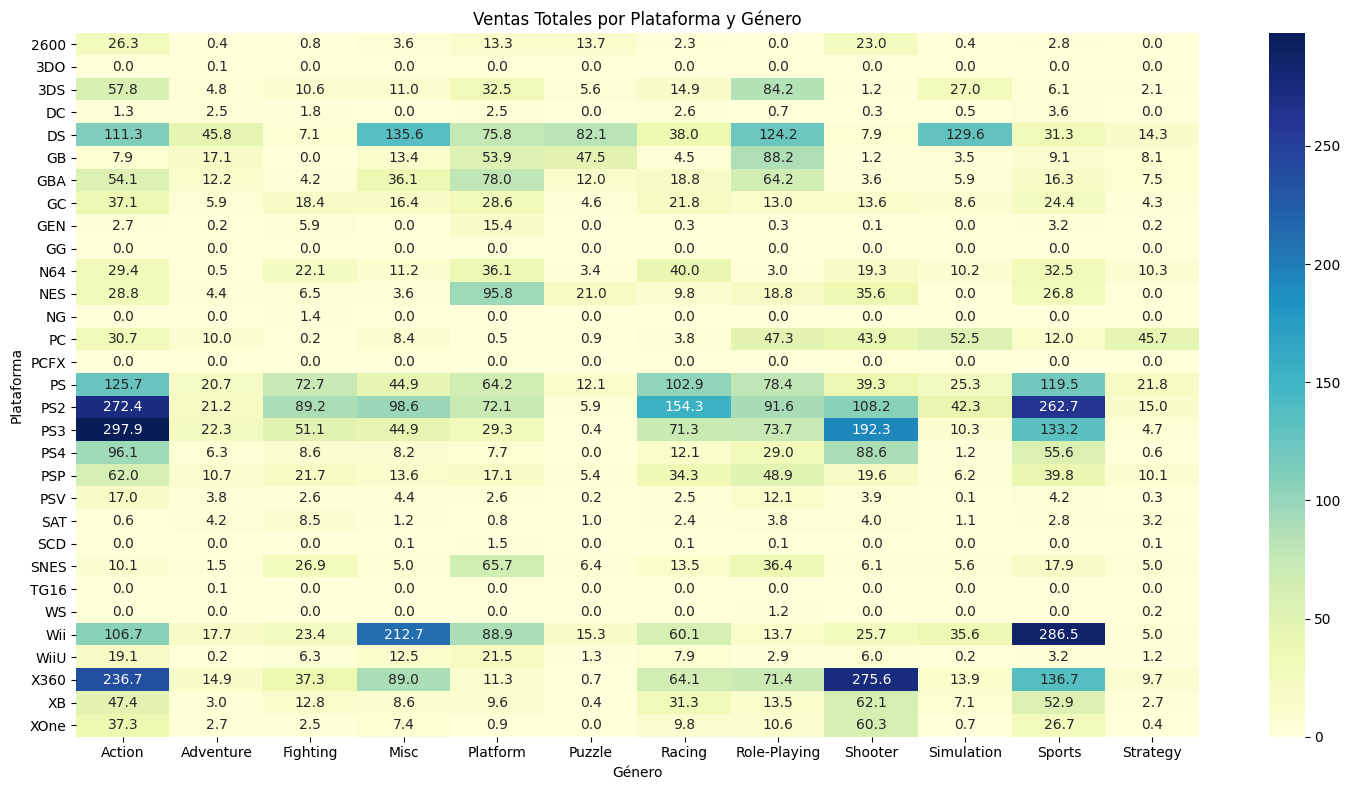

In [26]:
plt.figure(figsize= (15,8))

sns.heatmap(genre_by_platform, annot= True, fmt=".1f", cmap="YlGnBu")

plt.title('Ventas Totales por Plataforma y Género')
plt.xlabel('Género')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

A través del análisis realizado, se identificó que, entre las consolas modernas, la PlayStation 4 (PS4) es la plataforma que genera mayores ventas, seguida por el PC y Xbox One.

En cuanto a los géneros de videojuegos, se evidenció que las categorías Action, Sports y Shooter son las que han generado los mayores ingresos globales. Además, los géneros Action y Sports no solo destacan por sus ventas, sino también por contar con la mayor cantidad de publicaciones, lo que refleja una alta demanda y una fuerte presencia en el mercado.

También cabe resaltar que consolas que actualmente están en el mercado, como la PS3, Xbox 360 y Wii, generaron ingresos significativos, lo que demuestra su impacto en la industria durante sus años de mayor actividad.


# 4. Crea un perfil de usuario para cada región

In [27]:
user_na= df[['name','platform','year_of_release','genre','na_sales','rating']] 
user_eu= df[['name','platform','year_of_release','genre','eu_sales','rating']]
user_jp= df[['name','platform','year_of_release','genre','jp_sales','rating']] 


***Generos más populares***

In [28]:
genre_na = user_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(genre_na.head())
print()
genre_eu = user_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(genre_eu.head())
print()

genre_jp = user_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(genre_jp.head())
print()

      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57

     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60

          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02



Al analizar las preferencias por región, se observaron comportamientos diferenciados: en Norteamérica y Europa, los géneros Action, Sports y Shooter lideran las ventas, mientras que en Japón existe una clara preferencia por los Role-Playing Games, que superan ampliamente a otros géneros en esa región. Esto demuestra que, aunque algunos géneros tienen aceptación global, las preferencias regionales siguen siendo determinantes al momento de planificar campañas publicitarias y desarrollar nuevos títulos. Esta información es clave para enfocar esfuerzos comerciales y estratégicos según el perfil del usuario en cada mercado.

***Plataformas más populares por región.***

In [29]:
platform_na = user_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(platform_na.head())
print()
platform_eu = user_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(platform_eu.head())
print()

platform_jp = user_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(platform_jp.head())
print()

  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31

  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39

  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62



En Norteamérica, la Xbox 360 lidera el mercado con más de 595 millones en ventas, seguida de cerca por la PS2 y la Wii, lo que refleja una fuerte aceptación de consolas domésticas de alto rendimiento. En Europa, la PS2 encabeza las ventas, evidenciando su impacto duradero en esta región, seguida por la PS3 y la Xbox 360, lo que sugiere una mayor inclinación por consolas de Sony. Por otro lado, en Japón, las consolas portátiles y clásicas dominan el mercado: la Nintendo DS ocupa el primer lugar, seguida por la PlayStation original y la PS2, lo que refleja una fuerte preferencia por dispositivos compactos y una fidelidad a marcas establecidas.

***Influencia del rating por región***

In [30]:
rating_na = user_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_na.head())
print()
rating_eu = user_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_eu.head())
print()

rating_jp = user_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_jp.head())
print()

   rating  na_sales
0       E   1274.24
1  Unknow   1225.84
2       T    747.60
3       M    742.89
4    E10+    345.50

   rating  eu_sales
0       E    703.87
1  Unknow    609.65
2       M    480.00
3       T    421.79
4    E10+    183.35

   rating  jp_sales
0  Unknow    836.74
1       E    197.96
2       T    150.70
3       M     63.58
4    E10+     40.20



El análisis de ventas según la clasificación ESRB muestra cómo las preferencias de los consumidores varían no solo por región, sino también por tipo de contenido. En Norteamérica, los juegos clasificados como E (Everyone) lideran con más de 1274 millones en ventas, lo que indica una alta aceptación de títulos aptos para todo público. Le siguen de cerca los juegos con clasificación "Unknow" (probablemente sin información registrada), así como los juegos T (Teen) y M (Mature), lo que sugiere un mercado diverso en cuanto a edades. En Europa, la tendencia es similar, con los juegos E encabezando las ventas, aunque los juegos M también presentan una participación importante, reflejando un interés significativo por contenido más maduro.

En Japón, sin embargo, la mayoría de las ventas provienen de juegos sin clasificación registrada (Unknow), lo cual puede deberse a diferencias en los sistemas de clasificación o en el registro de datos. Le siguen los juegos E y T, con una menor representación de los títulos para mayores de edad (M) y E10+. Esto puede indicar una preferencia cultural por juegos más familiares o moderados en cuanto a contenido.

# 5. Prueba de hipótesis

***1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas***

Antes de ejecutar esa prueba, es importante asegurarse de que los datos no contengan valores NaN o Unknow, que pueden afectar los resultados por ende se debe filtrar y limpiar datos de user_score para PC y XOne.

In [31]:
user_score_pc = df[(df['platform'] == 'PC') & (df['user_score'].notna()) & (df['user_score'] != 'Unknow')]
user_score_xone = df[(df['platform'] == 'XOne') & (df['user_score'].notna()) & (df['user_score'] != 'Unknow')]

user_score_pc = user_score_pc['user_score']
user_score_xone = user_score_xone['user_score']


Se aplica una prueba de Levene para verificar si las varianzas de las calificaciones de usuarios (user_score) entre dos grupos ( PC y XOne) son iguales. con el fin de poder asumir si varianzas son iguales o desiguales (equal_var=True o False en ttest_ind).



In [32]:
stat, p_value = st.levene(user_score_pc, user_score_xone)

print("Estadístico de Levene:", stat)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Las varianzas son significativamente diferentes ( equal_var= False)")
else:
    print("No hay evidencia suficiente para decir que las varianzas son diferentes ( equal_var= True)")

Estadístico de Levene: 1.1706180824505048
Valor p: 0.2795532372785057
No hay evidencia suficiente para decir que las varianzas son diferentes ( equal_var= True)


Se recurre a un análisis de dos colas debido a que la hipótesis planteada evalúa la posible diferencia entre las medias de dos poblaciones, sin presuponer cuál de ellas podría ser mayor o menor

In [33]:

alpha= 0.5

result = st.ttest_ind(user_score_pc,user_score_xone, equal_var= True)

print('valor p:', result.pvalue)

if (result.pvalue < alpha):
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de usuarios en PC y Xbox One.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa entre las calificaciones.")


valor p: 1.3037979620149106e-05
Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de usuarios en PC y Xbox One.


El análisis estadístico aplicado evidencia que existen diferencias significativas en las calificaciones promedio dadas por los usuarios a los videojuegos en las plataformas PC y Xbox One. Esto implica que las preferencias o percepciones de calidad de los juegos pueden variar de manera relevante entre los usuarios de ambas plataformas.

***2.Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.***

Antes de ejecutar esa prueba, es importante asegurarse de que los datos no contengan valores NaN o Unknow, que pueden afectar los resultados por ende se debe filtrar y limpiar datos.

In [34]:
user_score_action = df[(df['genre']=='Action')& (df['user_score'].notna()) & (df['user_score'] != 'Unknow')]
user_score_sport = df[(df['genre']=='Sports') & (df['user_score'].notna()) & (df['user_score'] != 'Unknow')]

user_score_action = user_score_action['user_score']
user_score_sport = user_score_sport['user_score']



Al aplicar el método de Levene se presentaron errores, por lo tanto, se procedió a analizar la normalidad de los datos con el fin de determinar la prueba estadística más adecuada.

In [35]:
from scipy.stats import shapiro

stat_1, p = shapiro(user_score_action)
print(f'Estadístico: {stat_1:.4f}, p-valor: {p:.4f}')

if p < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("Los datos sí parecen seguir una distribución normal (no se rechaza H0)")

Estadístico: 0.9288, p-valor: 0.0000
Los datos NO siguen una distribución normal (rechazamos H0)


In [36]:
stat_2, p_2 = shapiro(user_score_sport)
print(f'Estadístico: {stat_2:.4f}, p-valor: {p_2:.4f}')

if p_2 < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("Los datos sí parecen seguir una distribución normal (no se rechaza H0)")

Estadístico: 0.9179, p-valor: 0.0000
Los datos NO siguen una distribución normal (rechazamos H0)


Se aplica la prueba de Fligner-Killeen debido a que los datos no siguen una distribución normal. Esta prueba permite verificar si las varianzas de las calificaciones de usuarios (user_score) entre dos grupos (Action y Sports) son iguales. El objetivo es determinar si se puede asumir igualdad de varianzas o no, lo cual es relevante para definir el parámetro equal_var=True o False al aplicar la prueba t-test para comparar medias.


In [37]:
from scipy.stats import fligner


stat_f, p_f = fligner(user_score_action, user_score_sport)

print("Estadístico Fligner-Killeen:", stat_f)
print("Valor p:", p_f)

if p_f < 0.05:
    print("Rechazamos la hipótesis nula: Las varianzas son significativamente diferentes(equal_var= False).")
else:
    print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente de que las varianzas sean diferentes( equal_var= True).")

Estadístico Fligner-Killeen: 14.805323653385702
Valor p: 0.00011919853052230807
Rechazamos la hipótesis nula: Las varianzas son significativamente diferentes(equal_var= False).


Se recurre a un análisis de dos colas debido a que la hipótesis planteada evalúa la posible diferencia entre las medias de dos poblaciones, sin presuponer cuál de ellas podría ser mayor o menor

In [38]:

alpha_2 = 0.05 


result_2 = st.ttest_ind(user_score_action, user_score_sport, equal_var=False)

print('Valor p:', result_2.pvalue)

if result_2.pvalue < alpha_2:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de usuarios en los géneros Action y Sport.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa entre las calificaciones.")


Valor p: 0.07370217419278526
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa entre las calificaciones.


A partir de la prueba estadística aplicada para comparar las calificaciones promedio de los usuarios entre los géneros Action y Sport, se obtuvo un valor p de 0.074, el cual es superior al nivel de significancia establecido (α = 0.05). Por lo tanto, no se puede rechazar la hipótesis nula, lo que indica que no existe evidencia estadísticamente significativa para afirmar que las calificaciones promedio difieren entre estos dos géneros. En consecuencia, se puede considerar que, desde la perspectiva de los usuarios, ambos géneros reciben valoraciones similares.

# 6. Conclusión general

A partir del análisis realizado, se puede proponer que la campaña para el año 2017 se enfoque estratégicamente en las preferencias específicas de cada región. En el caso de Norteamérica y Europa, los géneros Action, Sports y Shooter lideran las ventas, lo cual refleja una fuerte demanda y aceptación por parte del mercado occidental. En contraste, en Japón se evidencia una clara preferencia por los juegos de tipo Role-Playing (RPG), los cuales concentran la mayor proporción de ventas en esta región.

Además, es importante tener en cuenta el tipo de plataforma más utilizada por región, ya que esto puede influir significativamente en la efectividad de la campaña. Por ejemplo, mientras que plataformas como Xbox 360, PS2 y PS3 dominaron las ventas históricas en Norteamérica y Europa, en Japón se destaca la preferencia por consolas como Nintendo DS y PlayStation. También se observa el progresivo paso hacia las consolas de nueva generación, como la PS4, Xbox One y Pc, empiezan a posicionarse como líderes en ventas, especialmente en el mercado occidental. Estos cambios marcan una transición tecnológica importante que debe ser considerada al definir estrategias de distribución, marketing y desarrollo de nuevos títulos para maximizar el impacto comercial en cada región.